In [1]:
import os, re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dirRun = 'ID1001_POC_Nissan__4_Run'

In [3]:
Prefix = 'test_ID1001_POC_Nissan.ADValue.l'
Suffix = '_Run.csv'

In [4]:
# Getting all result files
Run_files = []
for file in os.listdir(dirRun):
    if file[:len(Prefix)] == Prefix and file[-len(Suffix):] == Suffix:
#         print(file)
        Run_files.append(os.path.join(dirRun,file))
Run_files

['ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l0_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l1_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l2_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l3_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l4_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l5_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l6_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l7_Run.csv']

In [5]:
Run_dfs = []
[Run_dfs.append(pd.read_csv(file, sep = ';')) for file in Run_files];

In [6]:
tcs = pd.concat(Run_dfs)
tcs.shape

(1800, 38)

In [7]:
# A VIRER
tcs = tcs[:800]

In [8]:
loopnum_col = list(tcs['LoopNum'])

In [9]:
expgene_col = list(tcs['ExpGene'])

In [10]:
# tcs.dtypes

In [11]:
quanti_params = [col for col in tcs.columns if \
                   (len(tcs[col].unique()) != 1)
                   and ('_num' not in col) 
                   and (tcs[col].dtype in ['int64', 'float64']) \
                   and (col not in ['LoopNum']) \
                   and ('closestdistance' not in col.lower())]
quanti_params

['relativelongitudinaldistance1',
 'relativespeed1',
 'acceleration1',
 'relativelongitudinaldistance2',
 'relativespeed2',
 'acceleration2',
 'acceleration3']

In [12]:
# Conservation des valeurs de paraletres quanti
quanti_df = tcs[quanti_params]
quanti_df.head()

,relativelongitudinaldistance1,relativespeed1,acceleration1,relativelongitudinaldistance2,relativespeed2,acceleration2,acceleration3
0,10.1,-8,0.8,-50.7,6,0.7,0.5
1,64.5,-17,1.5,-73.6,27,0.1,1.6
2,59.5,-12,0.0,-5.6,17,-0.7,1.4
3,23.8,9,-1.8,-48.0,-10,1.3,0.2
4,-76.9,-5,1.9,-73.4,19,-1.4,0.3


In [13]:
# Unfolding
qpu = pd.DataFrame(quanti_df.unstack())
qpu.columns = ['vals']
qpu.head()
# qp.unstack()

vals
relativelongitudinaldistance1 0  10.1
                              1  64.5
                              2  59.5
                              3  23.8
                              4 -76.9

In [19]:
# Ajout de colonnes repetees Loopnum et ExpGene
dat = qpu.copy()
print(len(loopnum_col))
dat['LoopNum'] = len(quanti_params) * loopnum_col
dat['ExpGene'] = len(quanti_params) * expgene_col
# qp.head()

800


In [20]:
# Reset index
dat.reset_index(inplace=True)
dat.head()

,level_0,level_1,vals,LoopNum,ExpGene
0,relativelongitudinaldistance1,0,10.1,0,Random_InitDOE
1,relativelongitudinaldistance1,1,64.5,0,Random_InitDOE
2,relativelongitudinaldistance1,2,59.5,0,Random_InitDOE
3,relativelongitudinaldistance1,3,23.8,0,Random_InitDOE
4,relativelongitudinaldistance1,4,-76.9,0,Random_InitDOE


In [21]:
dat.shape

(5600, 5)

In [22]:
# A VIRER
# dat = dat[dat['level_0'] in ['relativelongitudinaldistance1', 'relativespeed1']]

TypeError: boxplot() got an unexpected keyword argument 'color'

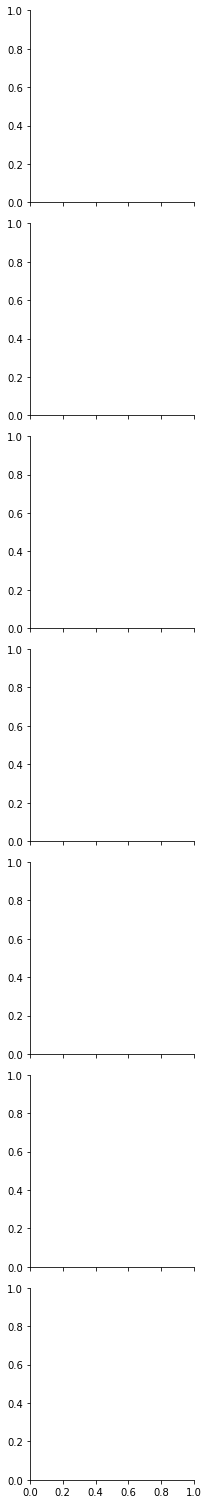

In [23]:
# g = sns.FacetGrid(dat, row="level_0", hue = 'LoopNum', palette = 'Set1')
# g = g.map(plt.boxplot, "ExpGene", "vals")

# PB = MEME ECHELLE EN X :/ (Avec histo)

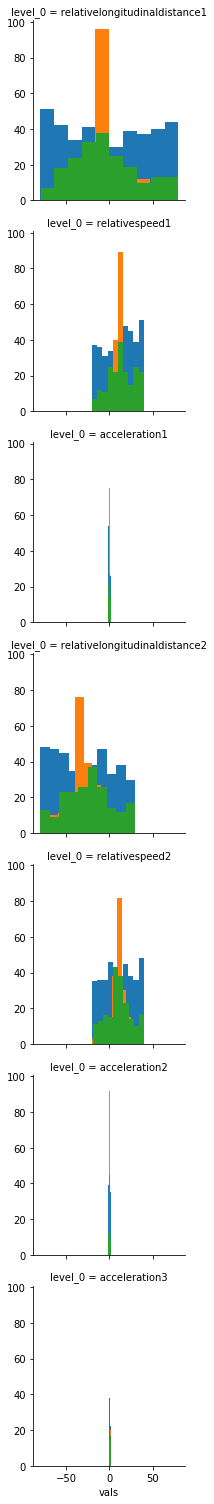

In [26]:
# g = sns.FacetGrid(dat, row="level_0", hue = 'LoopNum')
# g = g.map(plt.hist, "vals")